In [1]:
import warnings                                    ### Ignoring warnings for duplications
warnings.filterwarnings("ignore")

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt                    ### Importing all necessary libraries
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Importing dataset "countries" and reading it subsequently

In [3]:
country_data=pd.read_csv("C:/Users/vinee/Downloads/Country-data.csv")

In [4]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
2,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
4,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [5]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Therefore, it seems that the data has no NA/NULL values


In [6]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Checking for outliers through boxplot and scatterplot

In [7]:
social_in=["child_mort","health","life_expec","total_fer"]
eco_in=["gdpp","income","exports","imports","inflation"]

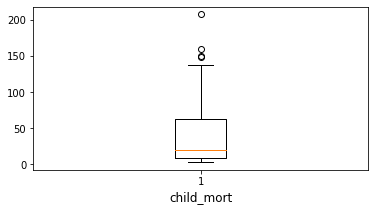

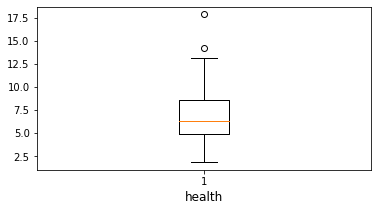

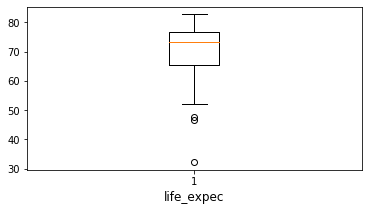

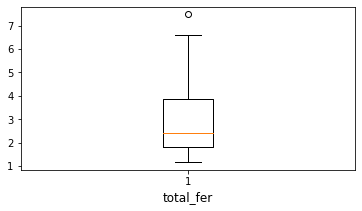

In [8]:
for i,item in enumerate(social_in,1):
    plt.subplot(2,2,i)
    plt.figure(figsize=(6,3))
    plt.boxplot(country_data[item])
    plt.xlabel(item, fontsize=12)
    plt.close(1)
    plt.show()
    
   

### Plotting scatter plot for gdpp vs social_in


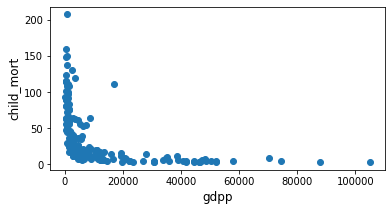

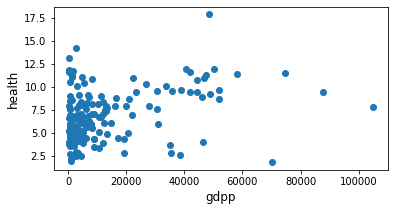

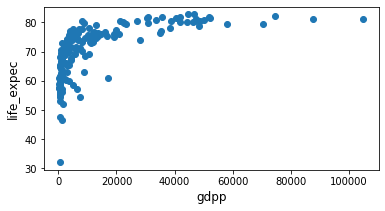

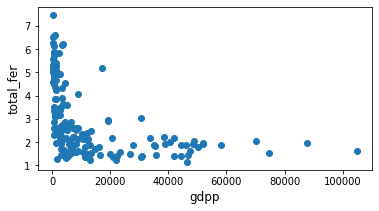

In [9]:
for j,item in enumerate(social_in,1):
    plt.subplot(2,2,j)
    plt.figure(figsize=(6,3))
    plt.scatter(country_data["gdpp"],country_data[item])
    plt.xlabel('gdpp', fontsize=12)                               
    plt.ylabel(item, fontsize=12)
    plt.close(1)
    plt.show()
    

### Plotting scatter plot for income vs social_in

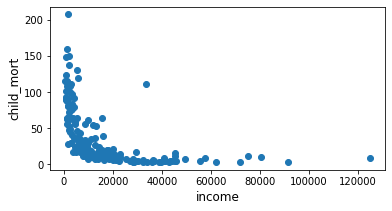

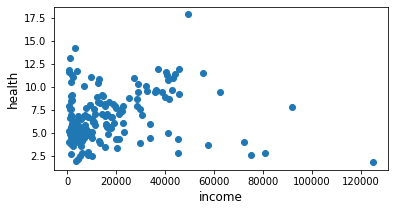

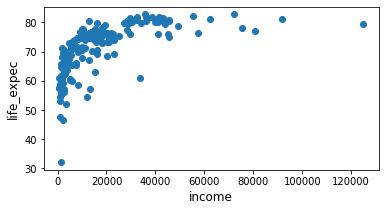

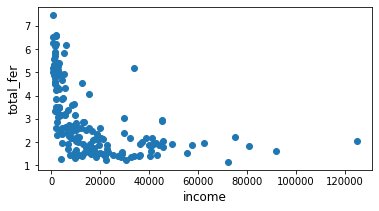

In [10]:
for j,item in enumerate(social_in,1):
    plt.subplot(2,2,j)
    plt.figure(figsize=(6,3))
    plt.scatter(country_data["income"],country_data[item])
    plt.xlabel('income', fontsize=12)                               
    plt.ylabel(item, fontsize=12)
    plt.close(1)
    plt.show()

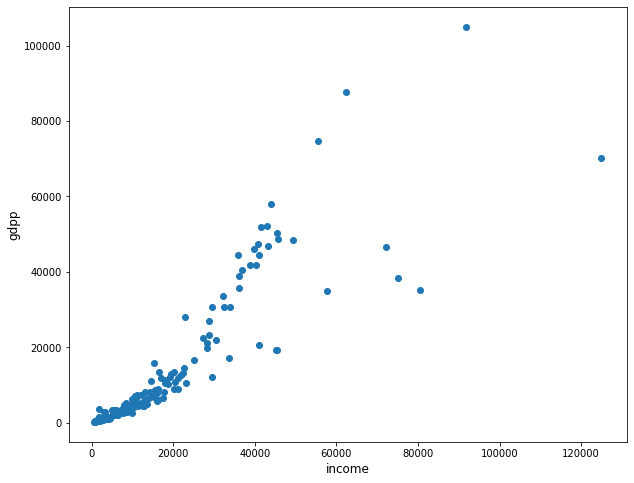

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(country_data["income"],country_data["gdpp"])
plt.xlabel('income', fontsize=12)                               
plt.ylabel('gdpp', fontsize=12)
plt.show()

In [12]:
country_data["gdpp"].corr(country_data["income"])

0.8955714330875312

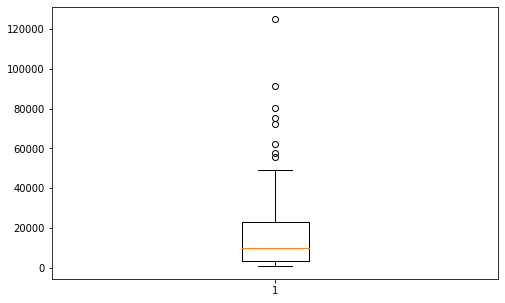

In [13]:
plt.figure(figsize=(8,5))
plt.boxplot(country_data["income"])
plt.show()

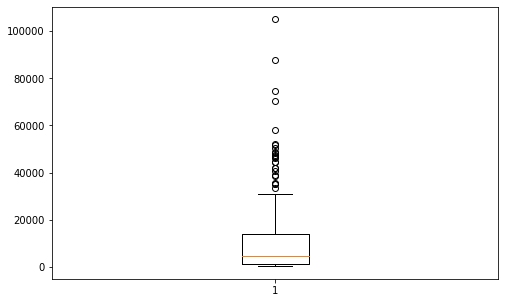

In [14]:
plt.figure(figsize=(8,5))
plt.boxplot(country_data["gdpp"])
plt.show()

### Understanding the distribution in income, gdpp and child_mortality

In [15]:
country_data["income"].describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

In [16]:
country_data["income"].quantile([.01,.05,.95,.99])

0.01      742.24
0.05     1213.00
0.95    48290.00
0.99    84374.00
Name: income, dtype: float64

In [17]:
country_data["gdpp"].describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

In [18]:
country_data["gdpp"].quantile([.01,.05,.95,.99])

0.01      331.62
0.05      465.90
0.95    48610.00
0.99    79088.00
Name: gdpp, dtype: float64

In [19]:
country_data["child_mort"].describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [20]:
country_data["child_mort"].quantile([.01,.05,.95,.99])

0.01      2.80
0.05      3.46
0.95    116.00
0.99    153.40
Name: child_mort, dtype: float64

### Capping the outliers through IQR Method and replacing all the values beyond [Q3+1.5*(Q3-Q1)] with [Q3+1.5*(Q3-Q1)] for gdpp, income, child_mort

In [21]:
### Calculating the outlier cap for gdpp

country_data["gdpp"].quantile(.75) + (1.5*(country_data["gdpp"].quantile(.75)-country_data["gdpp"].quantile(.25)))

33130.0

In [22]:
country_data.loc[(country_data["gdpp"]>33130.0),"gdpp"]=33130.0

In [23]:
country_data.gdpp.describe()

count      167.000000
mean     10351.281437
std      11612.044330
min        231.000000
25%       1330.000000
50%       4660.000000
75%      14050.000000
max      33130.000000
Name: gdpp, dtype: float64

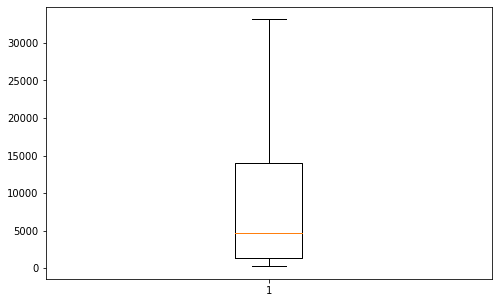

In [24]:
plt.figure(figsize=(8,5))
plt.boxplot(country_data["gdpp"])
plt.show()

In [25]:
### Calculating the outlier cap for income

country_data["income"].quantile(.75) + (1.5*(country_data["income"].quantile(.75)-country_data["income"].quantile(.25)))

51967.5

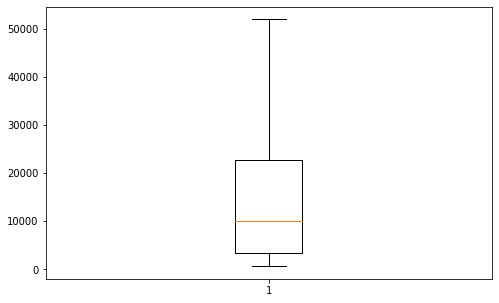

In [26]:
country_data.loc[(country_data["income"]>51967.5),"income"]=51967.5
plt.figure(figsize=(8,5))
plt.boxplot(country_data["income"])
plt.show()

In [27]:
### Calculating the outlier cap for child_mort

country_data["child_mort"].quantile(.75) + (1.5*(country_data["child_mort"].quantile(.75)-country_data["child_mort"].quantile(.25)))

142.875

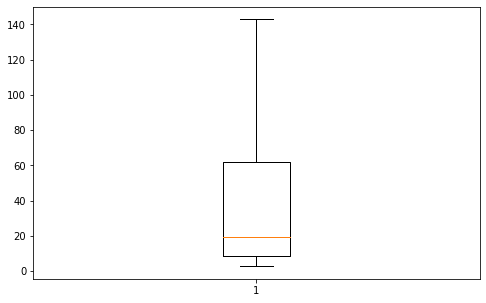

In [28]:
country_data.loc[(country_data["child_mort"]>142.875),"child_mort"]=142.875
plt.figure(figsize=(8,5))
plt.boxplot(country_data["child_mort"])
plt.show()

### Scaling the variables gdpp, income and child_mortality for subsequent clustering

In [29]:
rfm_df = country_data[['gdpp', 'income', 'child_mort']]
# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 3)

In [30]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['gdpp', 'income', 'child_mort']
rfm_df_scaled.head()

,gdpp,income,child_mort
0,-0.836926,-0.951191,2.744123
1,-0.859643,-0.969659,2.744123
2,-0.816628,-0.922830,2.744123
3,-0.855583,-0.991556,2.744123
4,-0.832953,-0.926787,2.590841


### Plotting SSD ELBOW-CURVE to find the optimum number of clusters

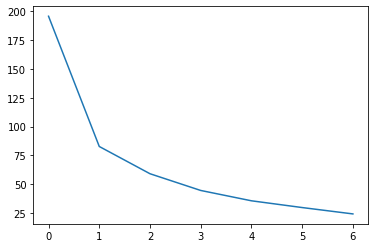

In [31]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

In [32]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5857969776244856
For n_clusters=3, the silhouette score is 0.5734191755191888
For n_clusters=4, the silhouette score is 0.4878249853807351
For n_clusters=5, the silhouette score is 0.4846701469063199
For n_clusters=6, the silhouette score is 0.4678051845337317
For n_clusters=7, the silhouette score is 0.4749616693432514
For n_clusters=8, the silhouette score is 0.4547555756250006


In [33]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# assign the label
country_data['cluster_id'] = kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0,2
1,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,2
2,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.5,6.59,897.0,2
3,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0,2
4,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.5,6.55,708.0,2


### Visualizing cluster properties using boxplot for each feature- gdpp, income, child_mortality

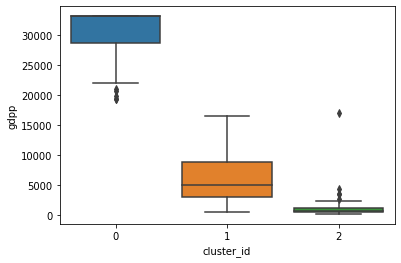

In [36]:
sns.boxplot(x='cluster_id', y='gdpp', data=country_data)  ### boxplot of gdpp for each cluster
plt.show()

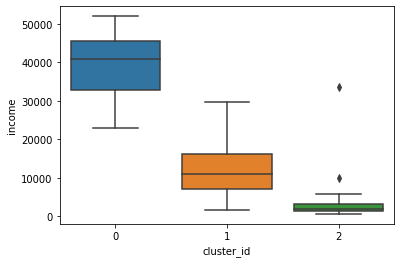

In [37]:
sns.boxplot(x='cluster_id', y='income', data=country_data)  ### boxplot of income for each cluster
plt.show()

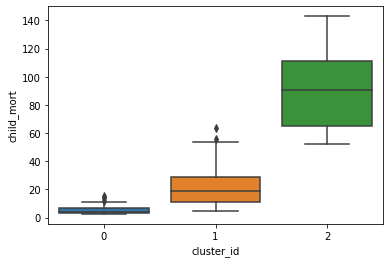

In [38]:
sns.boxplot(x='cluster_id', y='child_mort', data=country_data)   ### boxplot of child mortality for each cluster
plt.show()

### Using Hierarchical Clustering Algorithm through Dendrogram - Single and Complete Linkage Method

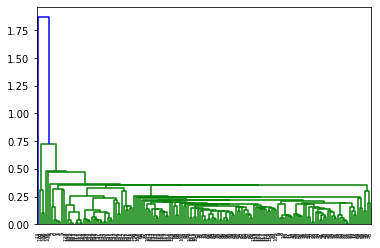

In [39]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

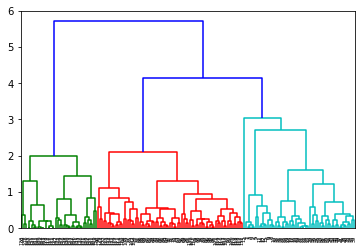

In [40]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [41]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# assign cluster labels
country_data['cluster_labels'] = cluster_labels
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0,2,0
1,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,2,0
2,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.5,6.59,897.0,2,0
3,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0,2,0
4,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.5,6.55,708.0,2,0


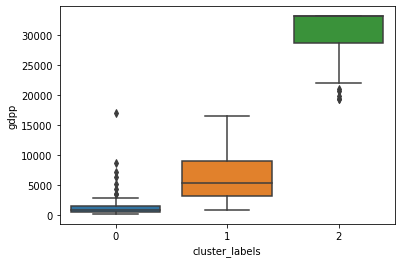

In [43]:
sns.boxplot(x='cluster_labels', y='gdpp', data=country_data)
plt.show()

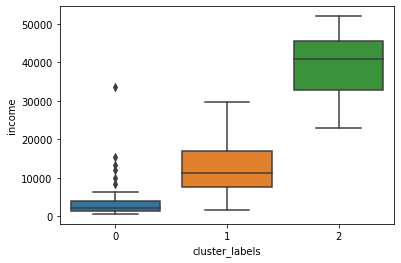

In [44]:
sns.boxplot(x='cluster_labels', y='income', data=country_data)
plt.show()

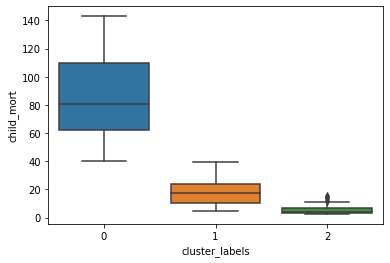

In [45]:
sns.boxplot(x='cluster_labels', y='child_mort', data=country_data)
plt.show()

### Visualizing Clusters Distribution through Principal Componenet Ananlysis and plotting them on a grid plot to check their distribution

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rfm_df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-2.479142,1.728951
1,-2.504250,1.714108
2,-2.449437,1.746122
3,-2.515211,1.708459
4,-2.384232,1.606417


In [47]:
finalDf = pd.concat([principalDf, country_data[['cluster_labels']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster_labels
0,-2.479142,1.728951,0
1,-2.504250,1.714108,0
2,-2.449437,1.746122,0
3,-2.515211,1.708459,0
4,-2.384232,1.606417,0


In [48]:
finalDf["development_status"]=finalDf.cluster_labels.apply(lambda x: "least_developed" if x==0 else "developing" if x==1 else "developed")
finalDf.head()    ### Mapping cluster Lablel 0 as least developed, 1 as developing and 2 as developed

,principal component 1,principal component 2,cluster_labels,development_status
0,-2.479142,1.728951,0,least_developed
1,-2.504250,1.714108,0,least_developed
2,-2.449437,1.746122,0,least_developed
3,-2.515211,1.708459,0,least_developed
4,-2.384232,1.606417,0,least_developed


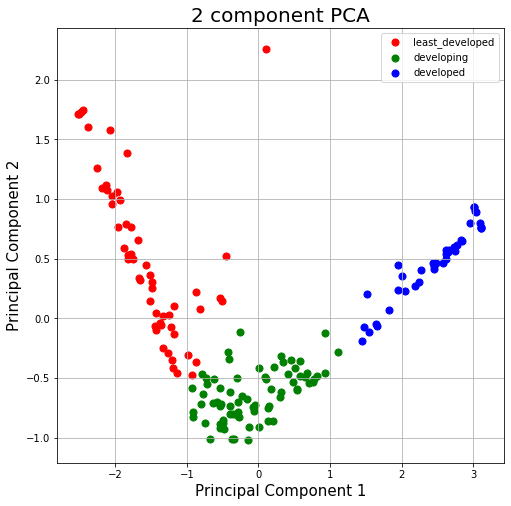

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["least_developed", "developing", "developed"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['development_status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### We can see from the above diagram that developing and developed country clusters are well defined. But, least developed country cluster is more spread out and loosely densed and hence we can see outliers in box plot distribution of gdpp and income for least developed countries.

In [50]:
country_data[country_data.cluster_labels==0].sort_values(by="gdpp")["country"].head(20)

19                     Burundi
24                     Liberia
9             Congo, Dem. Rep.
6                        Niger
1                 Sierra Leone
41                  Madagascar
16                  Mozambique
3     Central African Republic
21                      Malawi
46                     Eritrea
22                        Togo
10               Guinea-Bissau
23                 Afghanistan
28                      Gambia
37                      Rwanda
8                 Burkina Faso
51                       Nepal
27                      Uganda
14                      Guinea
0                        Haiti
Name: country, dtype: object

In [51]:
country_data[country_data.cluster_labels==0].sort_values(by="child_mort",ascending=False)[["country","child_mort","income","gdpp"]].head(10)

,country,child_mort,income,gdpp
0,Haiti,142.875,1500.0,662.0
1,Sierra Leone,142.875,1220.0,399.0
2,Chad,142.875,1930.0,897.0
3,Central African Republic,142.875,888.0,446.0
4,Mali,137.000,1870.0,708.0
5,Nigeria,130.000,5150.0,2330.0
6,Niger,123.000,814.0,348.0
7,Angola,119.000,5900.0,3530.0
8,Burkina Faso,116.000,1430.0,575.0
9,"Congo, Dem. Rep.",116.000,609.0,334.0


### As we can see, the 5 countries that need immediate aid is naturally the countries with the highest child mortality figures with some of the lowest income per capita and some of the lowest gdp per capita. 

### Therefore, the countries are-
1. Sierra Leone
2. Central African Republic
3. Haiti
4. Chad
5. Mali

Niger and Congo, Dem. Rep. have also comparably some of the highest child mortality figures with some of the lowest gdp per capita. Therefore, they also require urgent attention.